In [1]:
import os
import glob
import time
import numpy as np
import plate
import context
import jsonutil
import perspective
import scene
import utils
import annotations

In [20]:
!zip -r ../cr-plates-generator/ wrap.zip

/bin/sh: 1: zip: not found


In [2]:
from perspective import *
def warp_image2(image, bboxes, context,theta, phi, gamma):
    step = int(context.getConfig("Perspective", "rotation_step"))
    fov = int(context.getConfig("Perspective", "field_of_view"))
    scale = float(context.getConfig("Perspective", "scale"))
    rotate_bboxes = context.getBoolean("Image", "rotate_bboxes")
    result_image, result_bboxes = warp_image(image, theta, phi, gamma, scale, fov, bboxes, rotate_bboxes)
    return result_image, result_bboxes

In [3]:
appContext = context.Context('configuration.cfg')

In [4]:
dataset_size = int(appContext.getConfig('General', 'dataset_size'))
output_path = appContext.getConfig('General', 'output_path')
annotator_type = appContext.getConfig('General', 'annotation_type')
clear_output = appContext.getBoolean('General', 'clear_output')

In [5]:
r = [row.split(".jpg")[0] for row in os.listdir('../../convertor/emm_fold1/images/train2017/')]

In [6]:
import cv2

In [7]:
def warp(image_data,f,size=224,teta=10,phi=10):
    image_data = cv2.resize(image_data,(size,size))
    row = np.array(f.read().replace("\n"," ").split(" "))[:-1].astype(float).reshape(2,5)[:,1:]*size
    bounding_boxes = []
    for f in row:
        bounding_boxes0 = {"cx":f[0],"cy":f[1],"w":f[2],"h":f[3]}
        bounding_boxes.append(bounding_boxes0)
#     image_data2, bounding_boxes2 = perspective.warp_image_random(image_data, bounding_boxes, appContext)
    image_data2, bounding_boxes2 =warp_image2(image_data, bounding_boxes, appContext,phi, teta, 0)
    bounding_boxes_result = []
    for bb in bounding_boxes2:
        cx = bb['cx']
        w1 = bb['w']
        cy = bb['cy']
        h1 = bb['h']
        box = [cx-w1//2,cy-h1//2,cx + w1//2,cy + h1//2]
        box = np.array(box).astype(int)
        bounding_boxes_result.append(box)
    return image_data2,bounding_boxes_result

In [8]:
from matplotlib import pyplot as plt

In [9]:
# plt.figure(figsize=[20,20])
# index = 10
# for iii in range(16):
#     image_data = cv2.imread("../../convertor/emm_fold1/images/train2017/{}.jpg".format(r[index]))[:,:,::-1]
#     image_data = cv2.resize(image_data,(224,224))
#     f = open("../../convertor/emm_fold1/labels/train2017/{}.txt".format(r[index]))
#     image_data1,bounding_boxes_result = warp(image_data,f,size=224,teta=10,phi=10)
#     for i,box in enumerate(bounding_boxes_result):
#         if i==0:
#             image_data1 = cv2.rectangle(image_data1,(box[0], box[1]),(box[2], box[3]),(255, 0, 0), 2)
#         else:
#             image_data1 = cv2.rectangle(image_data1,(box[0], box[1]),(box[2], box[3]),(0, 255, 0), 2)
#     plt.subplot(4,4,iii+1)
#     plt.imshow(cv2.resize(image_data1[:,:,0:3],(224,224)))
# plt.show()

In [10]:
# from __future__ import print_function
# %matplotlib notebook
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.widgets import Slider, Button, RadioButtons

# t = Slider(axfreq, 'theta', -60, 60.0, valinit=f0, valstep=delta_f)
# p = Slider(axamp, 'phi', -20.0, 20.0, valinit=a0)

# index = 10
def get_image(teta,phi):
    image_data = cv2.imread("../../convertor/emm_fold1/images/train2017/{}.jpg".format(r[index]))[:,:,::-1]
    image_data = cv2.resize(image_data,(224,224))
    f = open("../../convertor/emm_fold1/labels/train2017/{}.txt".format(r[index]))
    image_data1,bounding_boxes_result = warp(image_data,f,size=224,teta=teta,phi=phi)
    for i,box in enumerate(bounding_boxes_result):
        if i==0:
            image_data1 = cv2.rectangle(image_data1,(box[0], box[1]),(box[2], box[3]),(255, 0, 0), 2)
        else:
            image_data1 = cv2.rectangle(image_data1,(box[0], box[1]),(box[2], box[3]),(0, 255, 0), 2)
    return image_data1
# class IndexTracker(object):
#     def __init__(self, ax):
#         self.ax = ax
#         ax.set_title('use scroll wheel to navigate images')
#         self.ind = 0
#         self.X = get_image(0,0)
#         self.slices=89
#         self.im = ax.imshow(self.X)
#         self.update()
#     def onscroll(self, event):
#         print("%s %s" % (event.button, event.step))
#         print('sdfsdds')
#         if event.button == 'up':
#             self.ind = (self.ind + 1) % self.slices
#         else:
#             self.ind = (self.ind - 1) % self.slices
#         self.update()

#     def update(self):
#         self.X = get_image(self.ind,0)
#         self.im.set_data(self.X)
#         ax.set_ylabel('slice %s' % self.ind)
#         self.im.axes.figure.canvas.draw()


# fig, ax = plt.subplots(1, 1)

# image_data = cv2.imread("../../convertor/emm_fold1/images/train2017/{}.jpg".format(r[index]))[:,:,::-1]
# image_data = cv2.resize(image_data,(224,224))
# f = open("../../convertor/emm_fold1/labels/train2017/{}.txt".format(r[index]))
# image_data1,bounding_boxes_result = warp(image_data,f,size=224,teta=10,phi=10)
# for i,box in enumerate(bounding_boxes_result):
#     if i==0:
#         image_data1 = cv2.rectangle(image_data1,(box[0], box[1]),(box[2], box[3]),(255, 0, 0), 2)
#     else:
#         image_data1 = cv2.rectangle(image_data1,(box[0], box[1]),(box[2], box[3]),(0, 255, 0), 2)
# X = image_data1

# tracker = IndexTracker(ax)
# fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
# plt.show()

<IPython.core.display.Javascript object>


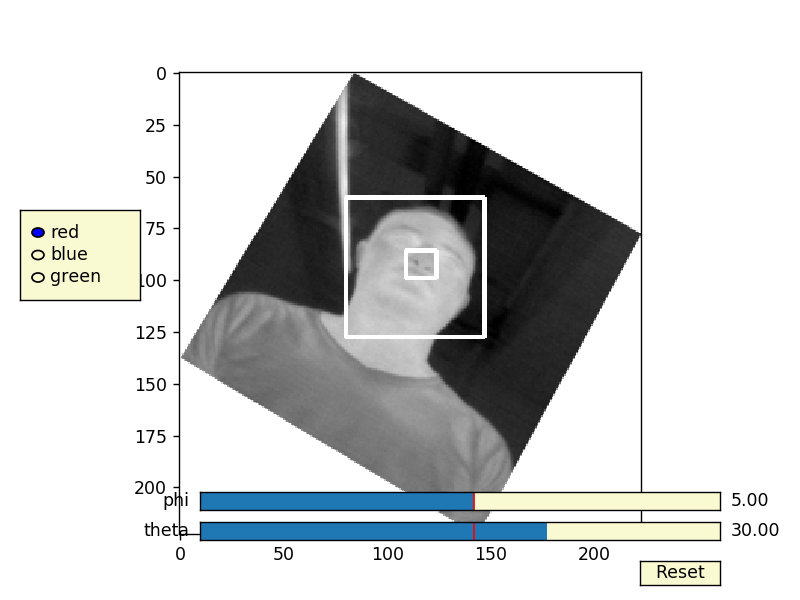

In [14]:
index = 80
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
fig, ax = plt.subplots(1, 1)
l = plt.imshow(get_image(0,0))
axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'theta', -90.0, 90.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'phi', -90.0, 90.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_data(get_image(amp,freq))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)


rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()